# Распределение по поправленным высотам для статьи

Поправлялись высоты только в 2013 году.

In [1]:
!date
!pwd
#Чт июл  2 00:48:11 MSK 2020
#/home/alena/SPHERE/Analysis/Telemetry

Чт июл  2 00:48:11 MSK 2020
/home/alena/SPHERE/Analysis/Telemetry


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from math import pi
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [2]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
#plt.rcParams['font.size'] = 12

## Чтение данных

In [5]:
dirname = '~/SCIENCE/SPHERE/ExpData/Data.telemetry/'
!ls $dirname

2012_calibr_testrun	      datum_2012_sec.csv
2012_events.csv		      datum_2013_final.csv
2012_events.csv.bad	      datum_2013_min.csv
2013_events.csv		      datum_2013_sec.csv
current_hv_code_everymin.dat  datum_2013_sec_H_correction.csv
currents_corrected.txt	      high_code.dat
datum_2009_sec.csv	      high_kod.dat
datum_2010_min.csv	      telemetry_min.csv
datum_2010_sec.csv	      telemetry_min_initial.csv
datum_2011_min.csv	      V_ham_2012.dat
datum_2011_sec.csv	      V_ham_2012_initial.dat
datum_2012_min.csv	      V_ham_2013.dat


In [5]:
#datum_2010_min.csv
datum = []
for year in range(2010, 2014):
    name = 'datum_' + str(year) + '_min.csv'
    datum.append ( pd.read_csv(dirname + name) )
name = 'datum_' + str(2009) + '_sec.csv'
datum.append ( pd.read_csv(dirname + name)[::60] )
datum = pd.concat(datum)

In [12]:
dirname = '~/SCIENCE/SPHERE/ExpData/Data.telemetry/'
name = "telemetry_min.csv"
datum = pd.read_csv(dirname + name, index_col=0) 
print(datum.shape)
datum.head(2)

(7169, 37)


,mm,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run,dN,dE,utime
0,0,2010,3,7,123952,5148.0891,10424.4104,1416.1,961.1,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,19.8,NaN,NaN,NaN,1,13.729398,103.53834,12:39:52
1,1,2010,3,7,124506,5148.0893,10424.4058,1418.2,963.2,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN,1,14.100462,98.24638,12:45:06


### Распределение по высотам

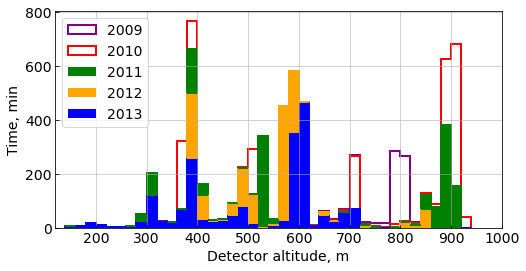

In [34]:
""" Время на разных высотах за все время без учета исправления высоты"""
fig = plt.figure(figsize=(8,4))
#fig = plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 14

hmin = 140
bins = 40
hmax = hmin + 20 * bins
#colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
#plcol = ['m','b', 'g', 'r', 'c', 'k']
plcol = ['b','orange', 'g', 'r', 'purple', 'k']

x1 = []
label = []
for year in range(2013, 2008, -1):
    x1.append(datum["H-455"][datum.year == year])
    if year <= 2010:
        label.append(str(year))
    else:
        label.append("")
plt.hist(x1, range=[hmin, hmax], bins=bins,
             histtype='step', linewidth=2, color=plcol[:5],
             stacked=True, 
             label=label)

x = []
label = []
for year in range(2013, 2010, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='stepfilled', color=plcol[:3],
             stacked=True, 
             label=label)

plt.xlim(120, 1000)
#plt.ylim(0, 1250)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend(loc=2)
plt.grid()
plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    
plt.savefig("time_on_altitude.png", bbox_inches='tight')

### Добавление исправленного времени 

In [16]:
dirname = '~/SCIENCE/SPHERE/ExpData/Data.telemetry/'
name = "datum_2013_final.csv"
datumf = pd.read_csv(dirname + name, index_col=0) 
print(datumf.shape)
datumf.head(2)

(2011, 29)


,mm,date,time,N,E,H,H-455,compass,P_hpa0,"T0,C",P_hpa1,"T1,C","dP,kpa","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,minuts,run,dN,dE,Hfinal
0,0,9,131704,5147.8302,10423.3018,762.9,315.2,31.8,930.2,18.3,929.5,-8.4,274.0,14.96,5.15,18.75,2.60,24.0,-8.5,11.0,16.1,-2.8,1.0,3.0,10,1,27.458795,-20.707668,762.9
1,1,9,131804,5147.8302,10423.3074,762.5,314.8,28.4,930.1,18.5,929.5,-8.4,274.0,14.97,5.15,18.74,2.62,24.5,-8.5,11.1,15.2,-2.8,1.0,3.0,11,1,27.458795,-14.265282,762.5


In [17]:
## для всех лет, кроме 2013, финальная высота без изменений
datum["Hfinal"] = datum.H

In [19]:
## для 2013
datum.H[datum.year == 2013].count()

2011

In [20]:
datum.Hfinal[datum.year == 2013] = datumf.Hfinal

/home/alena/Soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
dict((datum.H - datum.Hfinal)[datum.year == 2013].value_counts())

{0.0: 226,
 -7.300000000000011: 74,
 0.09999999999990905: 49,
 -0.09999999999990905: 44,
 0.20000000000004547: 40,
 0.5: 38,
 -0.2999999999999545: 36,
 -0.20000000000004547: 36,
 0.10000000000013642: 33,
 -7.2999999999999545: 33,
 0.2999999999999545: 27,
 -0.5: 26,
 -0.10000000000013642: 25,
 0.7000000000000455: 23,
 0.599999999999909: 21,
 -0.7000000000000455: 21,
 -7.399999999999977: 20,
 -0.40000000000009095: 18,
 -7.5: 16,
 -1.0: 16,
 1.0: 16,
 -0.7999999999999545: 15,
 -6.899999999999977: 14,
 -7.2000000000000455: 13,
 -7.0: 13,
 -7.300000000000068: 13,
 -8.0: 13,
 -7.600000000000023: 12,
 0.40000000000009095: 12,
 0.7999999999999545: 12,
 0.10000000000002274: 12,
 -0.599999999999909: 11,
 -7.100000000000023: 11,
 -6.600000000000023: 11,
 -6.5: 11,
 -0.1999999999998181: 11,
 1.2999999999999545: 10,
 -0.6000000000001364: 10,
 -7.7000000000000455: 10,
 -1.2999999999999545: 10,
 0.3000000000001819: 9,
 0.3999999999998636: 9,
 2.0: 9,
 1.5: 9,
 0.1999999999998181: 9,
 -1.2000000000000

In [79]:
datum.to_csv("telemetry_min_hfinal.csv")

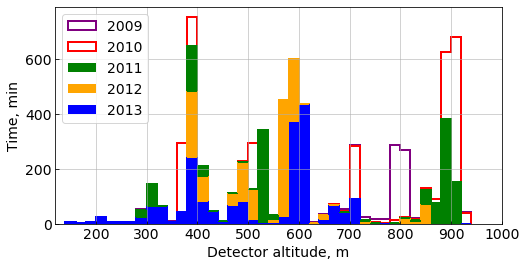

In [33]:
""" Время на разных высотах за все время с учетом исправления высоты в 2013 """
fig = plt.figure(figsize=(8,4))
plt.rcParams['font.size'] = 14

altitude = datum.Hfinal - 455
#altitude = datum["H-455"]

hmin = 140
bins = 40
hmax = hmin + 20 * bins
plcol = ['b','orange', 'g', 'r', 'purple', 'k']

x1 = []
label = []
for year in range(2013, 2008, -1):
    x1.append(altitude[datum.year == year])
    if year <= 2010:
        label.append(str(year))
    else:
        label.append("")
plt.hist(x1, range=[hmin, hmax], bins=bins,
             histtype='step', linewidth=2, color=plcol[:5],
             stacked=True, 
             label=label)

x = []
label = []
for year in range(2013, 2010, -1):
    x.append(altitude[datum.year == year])
    label.append(str(year))
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='stepfilled', color=plcol[:3],
             stacked=True, 
             label=label)

plt.xlim(120, 1000)
#plt.ylim(0, 1250)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend(loc=2)
plt.grid()
plt.savefig("time_on_altitude_corr.pdf", bbox_inches='tight')    
plt.savefig("time_on_altitude_corr.png", bbox_inches='tight')    

## Подбор ширины и кол-ва бинов

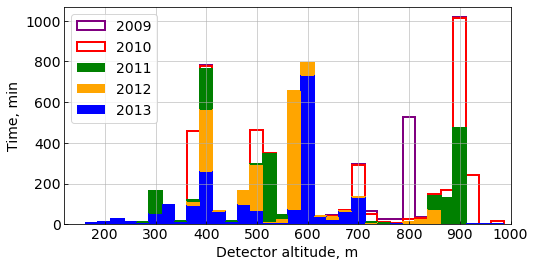

In [78]:
""" Время на разных высотах за все время с учетом исправления высоты в 2013 """
fig = plt.figure(figsize=(8,4))
plt.rcParams['font.size'] = 14

altitude = datum.Hfinal - 455

# 33, 153
dh = 25
hmin = 162
hmax = 970
bins = (hmax - hmin + dh - 1) // dh
hmax = hmin + dh * bins

plcol = ['b','orange', 'g', 'r', 'purple', 'k']

x1 = []
label = []
for year in range(2013, 2008, -1):
    x1.append(altitude[datum.year == year])
    if year <= 2010:
        label.append(str(year))
    else:
        label.append("")
plt.hist(x1, range=[hmin, hmax], bins=bins,
             histtype='step', linewidth=2, color=plcol[:5],
             stacked=True, 
             label=label)

x = []
label = []
for year in range(2013, 2010, -1):
    x.append(altitude[datum.year == year])
    label.append(str(year))
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='stepfilled', color=plcol[:3],
             stacked=True, 
             label=label)

plt.xlim(120, 1000)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend(loc=2)
plt.grid()
plt.savefig("time_on_altitude_c.pdf", bbox_inches='tight')    
plt.savefig("time_on_altitude_c.png", bbox_inches='tight')    

In [46]:
datum.Hfinal.max() - 455

964.8

# The END